# Entry task for Hotel Reservations ML project

Before we start working with the Hotel dataset, we want to make sure that you are comfortable working with the data using Python. If you haven't used Python much so far, don't worry, you should be able to cope with the task, we have attached sources from which you can draw knowledge and inspiration. Your goal in this task is:
- load **'diamonds'** dataset, it's built in seaborn library, so you don't have to download any data
- use **"pandas"** to calculate simple statistical parameters (extreme values, mean, median, standard deviation), check what datatypes are in different columns, check if there are missing values ​​in the data, try to create a pivot table
- use **matplotlib** and **seaborn** to visualize data from **'diamonds'** table, try to use many different kinds of plots (e.g. bar plot, box plot, violin plot, histogram, kde plot, correlation heat map)
  
Recommended sources:
- [pandas documentation](https://pandas.pydata.org/docs/)
- [seaborn documentation and tutorial](https://seaborn.pydata.org/tutorial.html)
- [pandas tutorial by Keith Galli](https://www.youtube.com/watch?v=vmEHCJofslg)
- [matplotlib tutorial by Corey Schafer](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = sns.load_dataset('diamonds')

In [23]:
df = pd.DataFrame(data=data)
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [24]:
print(df.dtypes)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [25]:
nans = {}
for col in df.columns:
    nans[col] = df[col].isna().sum()
print(nans)

{'carat': 0, 'cut': 0, 'color': 0, 'clarity': 0, 'depth': 0, 'table': 0, 'price': 0, 'x': 0, 'y': 0, 'z': 0}


In [26]:
for col in df.columns:
    if df[col].dtype == 'float64':
        print(f"{col}: ")
        print(f"Median: {df[col].median()}")
        print(f"Mean: {df[col].mean()}")
        print(f"Standard deviation: {df[col].std()}")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")

carat: 
Median: 0.7
Mean: 0.7979397478680014
Standard deviation: 0.4740112444054184
Min: 0.2
Max: 5.01
depth: 
Median: 61.8
Mean: 61.749404894327036
Standard deviation: 1.432621318833661
Min: 43.0
Max: 79.0
table: 
Median: 57.0
Mean: 57.45718390804598
Standard deviation: 2.2344905628213225
Min: 43.0
Max: 95.0
x: 
Median: 5.7
Mean: 5.731157211716722
Standard deviation: 1.1217607467924928
Min: 0.0
Max: 10.74
y: 
Median: 5.71
Mean: 5.734525954764553
Standard deviation: 1.1421346741235552
Min: 0.0
Max: 58.9
z: 
Median: 3.53
Mean: 3.5387337782721544
Standard deviation: 0.7056988469499941
Min: 0.0
Max: 31.8


In [27]:
pivot1 = pd.pivot_table(df, values='carat', index='color', columns='clarity', aggfunc='sum')
# sum of carats for each color and clarity
print(pivot1)

clarity      IF    VVS1    VVS2      VS1      VS2      SI1      SI2      I1
color                                                                      
D         51.01  120.67  292.31   411.03   947.47  1392.28  1194.87   46.92
E         79.99  279.33  471.34   734.54  1462.81  1725.62  1578.66  112.83
F        177.45  363.57  575.13   929.87  1532.58  1706.61  1587.60  155.24
G        334.93  535.58  945.32  1564.29  1872.78  1619.55  1652.44  183.39
H        151.11  281.09  353.91   881.67  1476.57  2254.40  1939.82  233.01
I         73.78  197.00  247.62   868.76  1242.67  1533.47  1272.29  132.41
J         35.90   62.40  134.73   551.45   829.43   879.62   682.22   87.53


In [28]:
pivot2 = pd.pivot_table(df, values='carat', index='depth', aggfunc='mean')
print(pivot2)

       carat
depth       
43.0   1.045
44.0   1.000
50.8   1.430
51.0   0.300
52.2   0.700
...      ...
72.2   0.960
72.9   0.900
73.6   0.990
78.2   1.030
79.0   0.500

[184 rows x 1 columns]


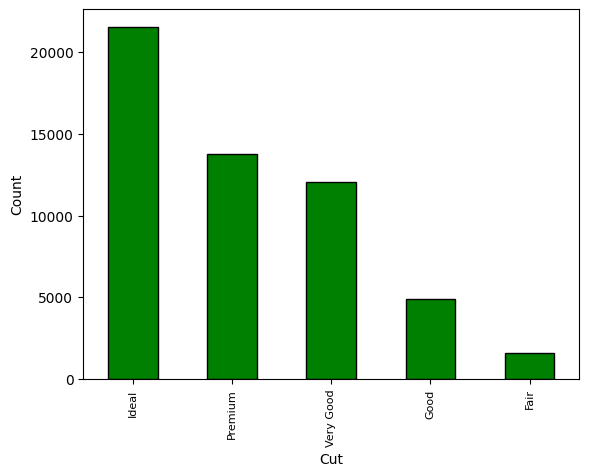

In [29]:
df['cut'].value_counts().plot(kind='bar', edgecolor='black', color='green').tick_params(axis='x', labelsize=8)
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

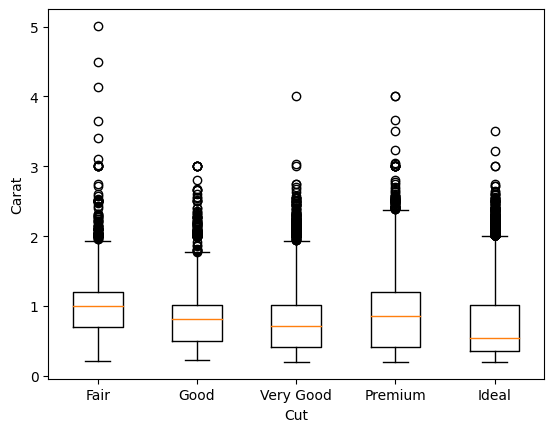

In [32]:
plt.boxplot([df[df['cut']=='Fair']['carat'], df[df['cut']=='Good']['carat'], df[df['cut']=='Very Good']['carat'], df[df['cut']=='Premium']['carat'], df[df['cut']=='Ideal']['carat']], labels=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.xlabel('Cut')
plt.ylabel('Carat')
plt.show()

/var/folders/f1/jg_j0x4x2dsc80qv20x17hgm0000gn/T/ipykernel_96897/1091358855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='color', y='depth', palette='pastel')


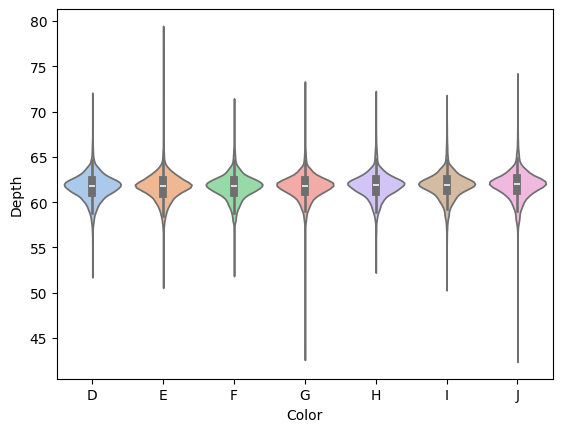

In [36]:
# color depth
sns.violinplot(data=df, x='color', y='depth', palette='pastel')
plt.xlabel('Color')
plt.ylabel('Depth')
plt.show()

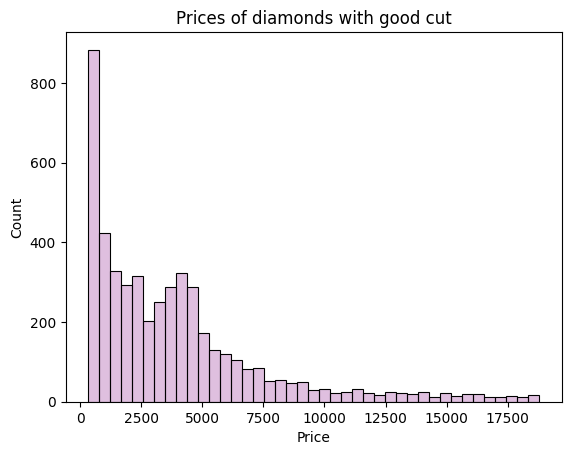

In [66]:
sns.histplot(data=df[df['cut']=='Good'], x='price', color='purple', alpha=0.25)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Prices of diamonds with good cut')
plt.show()

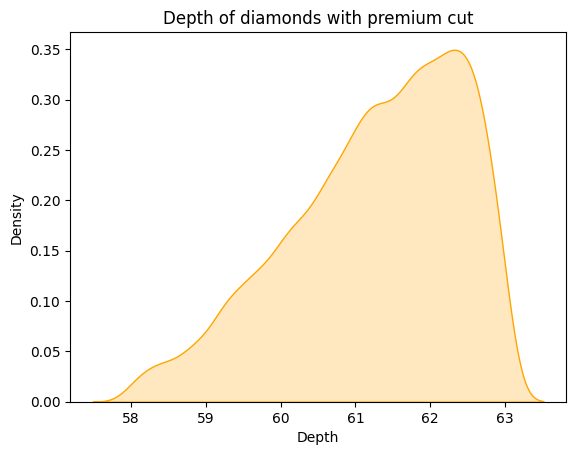

In [63]:
sns.kdeplot(data=df[df['cut']=='Premium'], x='depth', fill=True, color='orange')
plt.xlabel("Depth")
plt.title('Depth of diamonds with premium cut')
plt.show()

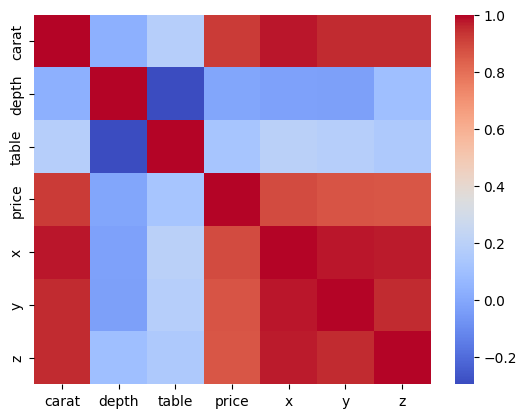

In [48]:
sns.heatmap(df.drop(columns=['cut', 'color', 'clarity']).corr(), cmap='coolwarm')
plt.show()

/Users/mateuszlambert/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

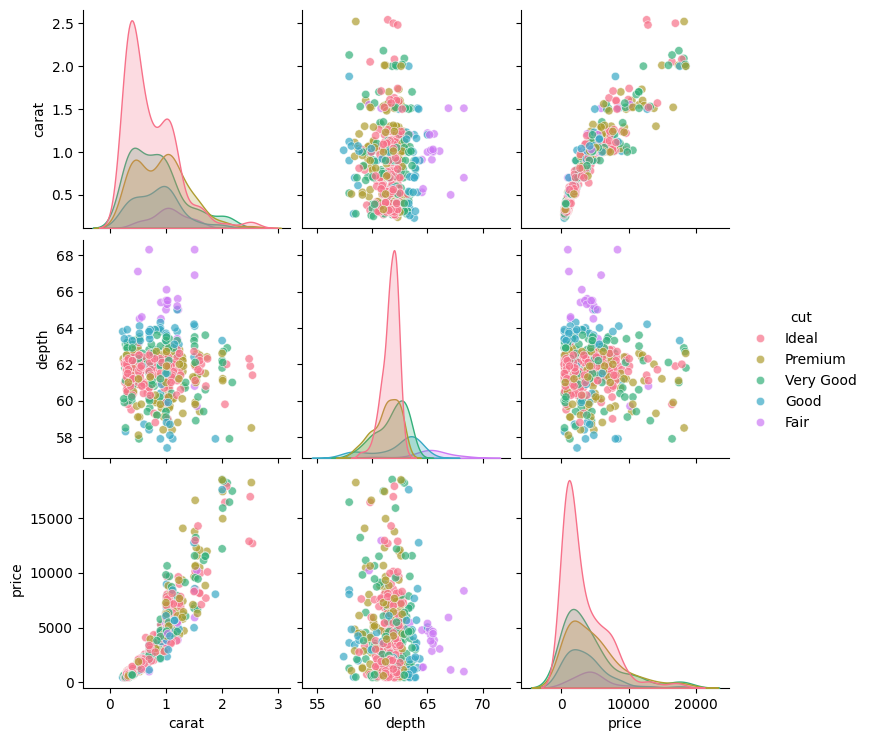

In [60]:
# hue = cut, carat, price, depth
to_drop = ['color', 'clarity', 'x', 'y', 'z', 'table']
df1 = df.drop(columns=to_drop)
df1 = df1.sample(frac=0.01, random_state=1)
sns.pairplot(data=df1, hue='cut', diag_kind='kde', palette='husl', plot_kws={'alpha': 0.7})
plt.plot()